# Propensity to Lapse Model Building
---

In this analysis, we aim to understand and predict customer churn, a critical aspect for any loyalty reward business. In the context of our partner company, customers gain reward points through purchases or flights, which can then be redeemed to book flights, hotels, or car rentals. The primary objective is to build a machine learning model that can predict the likelihood of a customer lapsing (i.e., becoming inactive) in the next 12 months.

A customer is defined as 'lapsed' when they have no points collections or redemptions for a consecutive 12 months period. Points collection is a customer's interaction with the business or partner, which adds loyalty points to their balance. Conversely, redemption refers to the use of accumulated points from the customer's balance for bookings or purchases.

The data provided contains various customer features and their current lapsing status (Active or Lapsed), which is converted into a boolean form (Active= 0, Lapsed=1). Our task is to utilize this data to build and optimize a machine learning model that can successfully predict customer churn.

**Our analysis will proceed as follows**:

- **Data Exploration**: We will start by understanding the nature of our dataset, look into each feature, and derive some initial insights.


- **Data Cleaning and Preprocessing**: Any missing or inconsistent data will be dealt with in this stage. We will also create additional features if required, and convert categorical data into numeric ones, if any.


- **Model Building**: In this stage, we will choose an appropriate machine learning algorithm to train a model on our dataset. The choice of algorithm will depend on the nature and distribution of our data.


- **Model Evaluation and Optimization**: We will evaluate the initial performance of our model and optimize it for better accuracy using techniques such as cross-validation and hyperparameter tuning.


- **Model Comparison and Selection**: We will compare the developed models and select the more appropriate one for our case.


- **Further Suggestions on Reducing Churn Rates**: Finally, we will use our optimized model to present the key findings and suggest marketing strategies that will eventually reduce the churn rates.



The outcome of this analysis will not only be a model to predict customer churn but also some insights and suggestions that could help the marketing team devise strategies to reduce churn rates. **Our findings and suggestions will be documented in a presentation format suitable for the marketing team**.

*The current analysis will be done on [Jupyter Notebook](http://jupyter.org/) and in [Python 3.10.0](https://www.python.org/downloads/release/python-3100/).*
 
---

> Dimitrios Matsanganis <br />
> Academic ID: f2822212 <br />
> MSc Business Analytics 2022-2023 FT <br />
> Athens University of Economics and Business <br />
> dmatsanganis@gmail.com, dim.matsanganis@aueb.gr

---

---
## Data Exploration
---

In this section, we will dive into our dataset and perform a thorough exploration. Understanding the data is a crucial step before we proceed to model building as it gives us insights about the distribution, potential outliers, and overall structure of the data. Our analysis will be primarily guided by the features provided in the dataset, which include:

- **State**: This is our target variable indicating the lapsed status of a customer. It is a binary variable with 0 indicating an active customer and 1 indicating a lapsed customer.


- **Sum_collect**: This feature indicates the total number of times a customer has collected points.


- **Sum_redeem**: This refers to the total number of times a customer has redeemed points.


- **Sum_collect_points**: This feature represents the total points a customer has collected over their tenure.


- **Sum_redeem_points**: This indicates the total points a customer has redeemed.


- **Years_in_the_program**: This is the total number of years a customer has been registered in the loyalty program.


- **Months_since_last_transaction**: This feature shows the number of months since a customer's last action (collection or redemption).

The data for this analysis is sourced from the `CustomerChurnTrainingData.csv` file which comprises **5000 observations**, each representing a unique customer.

To be more precise, our data exploration will involve the following steps:

**1. Basic Overview of the Data**: We'll start with a high-level overview of the dataset by examining the data types and summary statistics for each feature.


**2. Univariate Analysis**: Here, we'll delve into individual features to understand their distribution and identify any potential outliers or biases in the data.

**3. Bivariate Analysis**: We'll study the relationships between different pairs of features. This will help us understand if there are correlations between different features, particularly in relation to the target variable State.


**4. Missing Value Treatment**: Lastly, we'll examine the dataset for missing values and determine an appropriate strategy to handle them.

Through these steps, we hope to become intimately familiar with the dataset and form hypotheses about the factors that might influence customer churn. These hypotheses will be crucial in guiding the subsequent feature engineering and modeling steps.
Next, we will move forward to the coding implementation of the above mentioned steps.

#### 1. Basic Overview of the Data:

First, we import the necessary libraries for this analysis and load the dataset.

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data.
df = pd.read_csv('CustomerChurnTrainingData.csv')

# Display the first 10 rows of the dataframe.
df.head(10)

,state,sum_collect,sum_redeem,sum_collect_points,sum_redeem_points,years_in_the_program,months_since_last_transaction
0,0,13,0,1269,0.0,19,1
1,1,6,0,2890,0.0,10,10
2,1,2,0,422,0.0,7,9
3,0,7,1,2690,14500.0,16,1
4,1,7,0,211,0.0,2,3
5,1,2,0,40,0.0,3,10
6,1,15,0,1136,0.0,4,9
7,1,13,0,636,0.0,2,9
8,1,11,0,5785,0.0,4,1
9,0,5,0,150,0.0,16,1


In [2]:
# Check the shape of the dataframe.
df.shape

(5000, 7)

In [3]:
# Check the data types of the features.
df.dtypes

state                              int64
sum_collect                        int64
sum_redeem                         int64
sum_collect_points                 int64
sum_redeem_points                float64
years_in_the_program               int64
months_since_last_transaction      int64
dtype: object

In [4]:
# Summary statistics.
df.describe()

,state,sum_collect,sum_redeem,sum_collect_points,sum_redeem_points,years_in_the_program,months_since_last_transaction
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000
mean,0.499200,9.133600,0.166200,6235.350000,2827.35420,9.11940,3.82760
std,0.500049,8.991236,0.622459,16739.259116,14742.02891,6.73595,3.23765
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.00000
25%,0.000000,4.000000,0.000000,297.750000,0.00000,5.00000,1.00000
50%,0.000000,6.000000,0.000000,1220.000000,0.00000,6.00000,3.00000
75%,1.000000,13.000000,0.000000,4662.750000,0.00000,13.00000,6.00000
max,1.000000,205.000000,10.000000,304174.000000,401800.00000,27.00000,12.00000


The above code gives us an overview of the dataset including the number of rows and columns, the types of the variables, and statistical summaries such as mean, median, standard deviation, etc.

As we can see the dataframes contains 5000 rows/observations and 7 columns. All dataset's columns are integers (int64), except from the `sum_redeem_points` which is a float type variable (float64). 

Regarding the summary statistics, we can make the following observations:

- `State`: This is our target variable. We see that its mean is approximately 0.5, indicating that the dataset is well balanced with nearly equal proportions of active and lapsed customers.


- `Sum_collect`: The average number of times a customer has collected points is around 9.1. However, the standard deviation is also quite high (8.99), indicating significant variation in the data. The range goes from 0 to 205 times, with a median of 6, suggesting some customers have very high collection activities.



- `Sum_redeem`: Customers redeem points less frequently on average (mean around 0.166). The maximum times a customer has redeemed points is 10.


- `Sum_collect_points`: On average, a customer collects about 6235 points. However, there's a large standard deviation (16739.26), implying a high variation in point collection. Some customers have collected as many as 304,174 points, significantly more than the average.


- `Sum_redeem_points`: The average points redeemed by a customer are about 2827. Similar to collection points, the redeemed points also show high variation (standard deviation = 14742.03), with some customers redeeming as many as 401,800 points.


- `Years_in_the_program`: Customers have been in the program for an average of approximately 9.1 years, with a standard deviation of 6.74 years. The range is from 0 to 27 years, suggesting that the program has a mix of new and very long-term customers.


- `Months_since_last_transaction`: On average, approximately 3.8 months have passed since a customer's last transaction. The standard deviation is around 3.24 months, and the range is from 1 to 12 months.


Overall, the dataset seems to cover a broad range of customer behavior, from those who are new and relatively inactive to those who are highly engaged and have been in the program for many years. Furthermore, we need to notice that this variation will be useful when building our predictive model.

#### 2. Univariate Analysis:

Moving forward to the univariate analysis, we will generate **histograms for each numeric feature in the dataset** to help us understand their distributions.

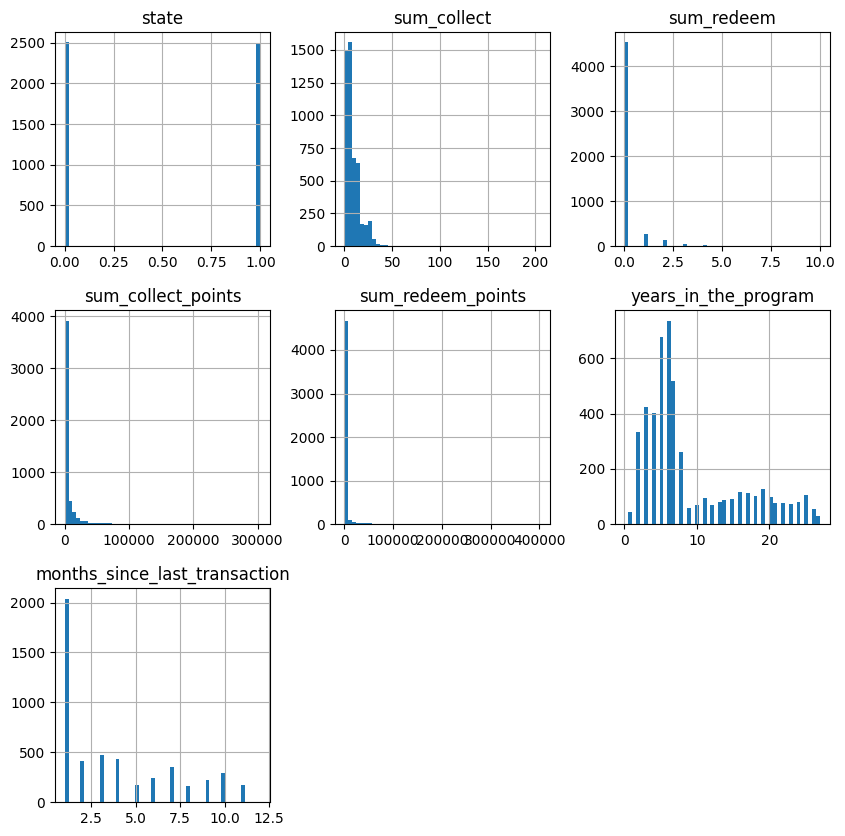

In [5]:
# Plot histograms of each numeric feature for univariate analysis.
df.hist(figsize=(10, 10), bins=50)
plt.show()

As we can see all the variables follow a right skewed distribution (except of course the binary state variable), which is something expected, since the variables refereed to natural limits. 

In comparison with the earlier summary statistics table we can further elaborate and say that the summary statistics do hint at possible right-skewness in the variables, as shown by the means being larger than the median values for `Sum_collect`, `Sum_collect_points`, `Sum_redeem_points`, `Years_in_the_program`, and `Months_since_last_transaction`. Also, a large difference between the maximum value and the 75% percentile could indicate a long tail to the right.

For example, in `Sum_collect`, the mean is 9.13 while the median is 6, suggesting a right-skewed distribution with a tail of customers who collect points many more times than average. Similarly, `Sum_collect_points` has a mean of 6235 and a median of 1220, which again suggests a right-skewed distribution with some customers collecting significantly more points than the average customer (natural limits variables).

#### 3. Bivariate Analysis:

For the Bivariate Analysis we will generate a correlation heatmap, allowing us to understand the relationships between different features of the dataset.

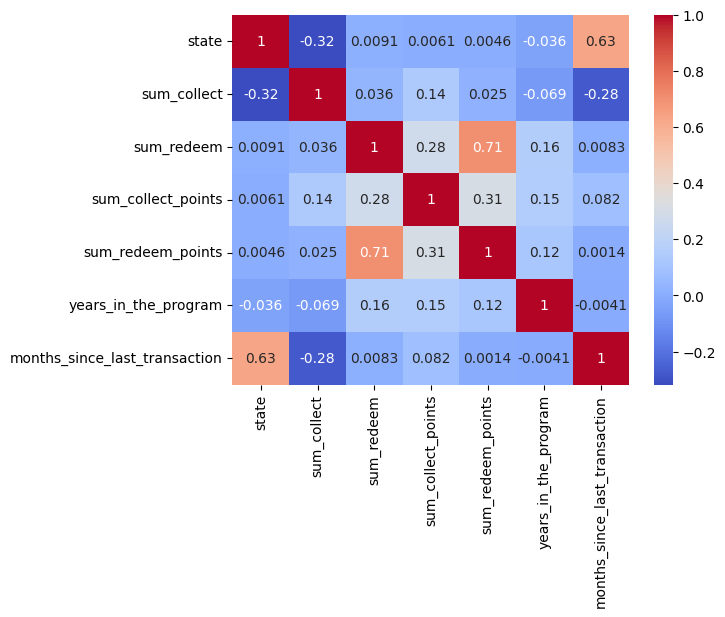

In [6]:
# Plot correlation matrix to understand the relationship between features.
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Based on the above correlation heatmap/matrix, here are the most meaningful insights:

- `State` and `Months_since_last_transaction`: These two features show a fairly strong positive correlation (0.63). This suggests that the more months that pass since the last transaction, the more likely it is that the customer will lapse. 


- `State` and `Sum_collect`: There is a moderate negative correlation (-0.317) between these two variables. This implies that customers who collect more points are less likely to lapse.


- `Sum_redeem` and `Sum_redeem_points`: These two features have a strong positive correlation (0.706). This means that as the number of times a customer redeems increases, the total number of points they redeem also tends to increase. 


- `Sum_redeem` and `Sum_collect_points`: There is a moderate positive correlation (0.277) between these variables, indicating that customers who collect more points are likely to redeem more often.


- `Years_in_the_program` shows weak positive correlations with `Sum_redeem`, `Sum_collect_points`, and `Sum_redeem_points`. This could mean that the longer a customer is in the program, the more they interact with it, though these relationships are not strong.


- `Months_since_last_transaction` has a moderate negative correlation with `Sum_collect` (-0.276). This suggests that customers who collect more frequently are likely to have more recent transactions.

These observations are essential for understanding relationships between features, and they will help guide the feature selection and modeling process. However, it's important to remember that correlation does not imply causation. These correlations are based on linear relationships, and there may be non-linear relationships that these correlations do not capture. 

Finally, we need to remember that these are pairwise correlations between two variables, holding all else constant. In the model, all variables will be used together to predict customer churn.

#### 4. Missing Value Treatment:

For the latest part of the Data Exploration section, we aim to identify the number of missing values in each feature. Depending on the results, we can determine how to handle the missing values. 

In [7]:
# Check for missing values.
df.isnull().sum()

state                            0
sum_collect                      0
sum_redeem                       0
sum_collect_points               0
sum_redeem_points                0
years_in_the_program             0
months_since_last_transaction    0
dtype: int64

As we can see there are **no missing values** in our dataset and for these reason we do not need to take any further actions.

These was our latest step in the Data Exploration analysis and next we will move forward to Data Cleaning and Preprocessing and Model Building steps.

---
### Data Cleaning and Preprocessing 
---

In this section, we will clean and preprocess our data to prepare it for model training. This involves - in general - the following steps:

1. **Missing Values**: We will inspect our data for any missing values. 

2. **Inconsistent Data**: We'll check for any inconsistencies in the data such as unexpected data types, impossible values or incorrect labels.

3. **Feature Engineering**: We might create new features from the existing ones if it helps enhance our model's performance. For example, the ratio of `sum_collect_points` to `sum_redeem_points` could be an indicator of customer's tendency to save points.

4. **Categorical Data**: If there were any categorical features, we would need to convert these into numerical values for our model to process. In our case, however, all features are already numerical.

Now, let's proceed with the data cleaning and preprocessing with only step 3 Feature Engineering since there are no missing values, unexpected data types, or categorical values in our dataset.

#### Feature Engineering

For the Feauture Engineering we will create the ratio of `sum_collect_points` to `sum_redeem_points` as an indicator of customer's tendency to save points. 

Then we will interpret the results of this ratio.

In [8]:
# Feature Engineering
df['collect_to_redeem_ratio'] = df['sum_collect_points'] / df['sum_redeem_points']
df['collect_to_redeem_ratio'].replace(np.inf, 0, inplace=True) # Replace any infinity values caused by division by zero.
df['collect_to_redeem_ratio'].fillna(0, inplace=True) # Replace any NaN values resulting from nulls in the data.

# Corrected Python Code
df['collect_to_redeem_ratio'].describe()

count    5000.000000
mean        0.157471
std         1.420150
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        67.594222
Name: collect_to_redeem_ratio, dtype: float64

The statistical summary of the `collect_to_redeem_ratio` leads us to the following results.

On average, the ratio of collected points to redeemed points is **0.157**. This suggests that, on average, customers collect more points than they redeem. The standard deviation is quite high (**1.42**) relative to the mean, which indicates a wide spread of the ratio values across customers. The minimum ratio is **0**, which means there are some customers who have not collected any points, or those who have redeemed all of their collected points.

Regarding the quartiles we can notice the following. The first quartile (the 25th percentile) is also 0, meaning at least 25% of customers have a ratio of 0. The median is also 0, which means that at least 50% of customers have a ratio of 0. The third quartile (the 75th percentile) is also 0, indicating that at least 75% of customers have a ratio of 0. Finally, the maximum ratio is **67.59**, indicating there are some customers who have collected many more points than they have redeemed.

From this, we can infer that **a large proportion of customers either redeem points as soon as they collect them or haven't redeemed any points at all**, given the high percentage of zeros. However, there is a **small number of customers who have a very high collection to redemption ratio, suggesting they prefer to accumulate points rather than redeeming them**. These customers might be contributing to the high standard deviation.

Now we are able to move forward to the next step of `Model Building`, but first we need to remove the created variable to avoid our model to be biased.

In [9]:
df = df.drop(['collect_to_redeem_ratio'], axis=1)

---
### Model Building
---

The first step to build a model is to select an appropriate machine learning algorithm for our dataset. Given that our task is a binary classification (predicting whether a customer will lapse or not), we could consider algorithms such as Logistic Regression, Decision Trees, Random Forest, Gradient Boosting Machines, or Support Vector Machines. **However, considering the simplicity, interpretability and our dataset, we'll start with Logistic Regression**.


---
#### Logistic Regression Model
---

With the following code, we are performing these tasks:

1. **Splitting the Dataset:** We divide the dataset into training and test sets. The model will learn from the training data and we will use the test data to evaluate the model's performance. We allocate 80% of the data to the training set and the remaining 20% to the test set. We also set a random state for reproducibility.


2. **Initializing the Logistic Regression Model:** We then initialize our Logistic Regression model. Logistic regression is a type of linear model used for binary classification tasks. It's one of the simplest, yet effective algorithms used in Machine Learning.


3. **Fitting the Model:** We fit our Logistic Regression model to the training data. This is where the model learns to classify based on the features in our dataset.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Divide the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=556555)

# Initialize the Logistic Regression model.
lr_model = LogisticRegression()

# Fit the model to the training data.
lr_model.fit(X_train, y_train)

LogisticRegression()

After creating the Logistic Regression model we are evaluating the performance of the trained model on the test dataset. **It is important to note that this procedure would be followed for every created model, in order to finally select the more appropriate one**.

1. **Model Evaluation:** 

    - We first use the model to make predictions on the test set (`y_test_pred = lr_model.predict(X_test)`), and then compute the accuracy of these predictions (`accuracy_score(y_test, y_test_pred)`).
    

2. **Classification Report:** 

    - We then generate a detailed report of the classification performance metrics including precision, recall, f1-score, and support for both classes. This is done using the `classification_report` function from `sklearn.metrics`.


3. **Confusion Matrix:** 

    - We create a confusion matrix (`confusion_matrix(y_test, y_test_pred)`) which gives us a tabular representation of Actual vs Predicted values. This helps us to understand our model's performance from various aspects. 
    - We also visualize the confusion matrix using seaborn's heatmap.


4. **ROC Curve and AUC:** 

    - We compute the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC). The ROC curve is a graphical representation of the contrast between true positive rates and false positive rates at various thresholds. 
    - The AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
    

5. **Misclassification Rate:** 

    - We compute the misclassification rate for the Logistic Regression model, which gives us the proportion of instances that were incorrectly classified by the model.


6. **Feature Importance:** 

    - Lastly, we compute and display the feature importance, which tells us how much each feature contributed to the model. This can be helpful for understanding the model and for feature selection.

Test accuracy:  0.826 


Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.82      0.82       491
           1       0.83      0.83      0.83       509

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000
 

Confusion matrix:


,Active (Predicted),Lapsed (Predicted)
Active (Actual),402,89
Lapsed (Actual),85,424


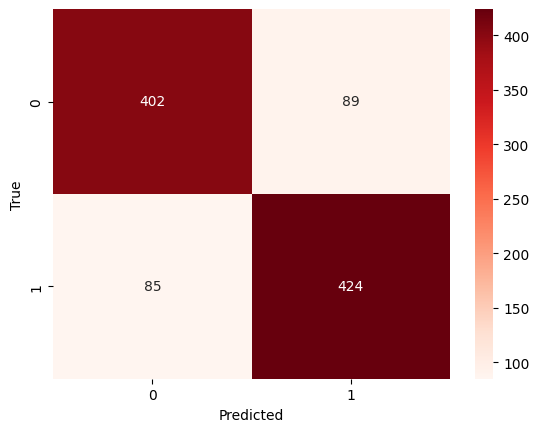

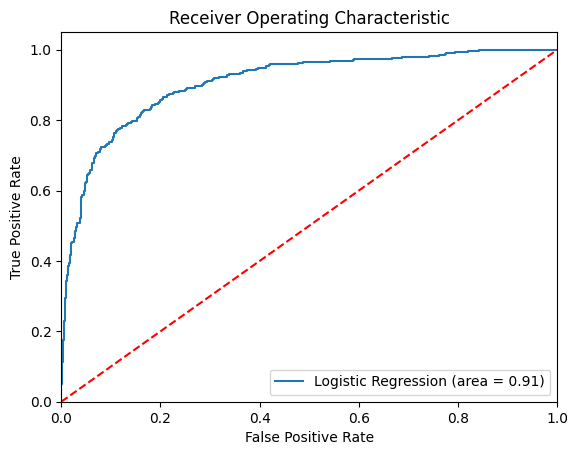




Logistic Regression Model
Misclassification rate:  0.174




,feature,importance
5,months_since_last_transaction,4.963552e-01
1,sum_redeem,1.879634e-03
3,sum_redeem_points,8.544757e-07
2,sum_collect_points,-1.357102e-06
4,years_in_the_program,-5.766004e-02
0,sum_collect,-1.269574e-01


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Evaluate the model on the test set (Accuracy).
y_test_pred = lr_model.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, y_test_pred), "\n")

# Print a classification report.
print("\nClassification Report:\n\n", classification_report(y_test, y_test_pred), "\n")

print("Confusion matrix:")
      
# Confusion matrix.
cm = confusion_matrix(y_test, y_test_pred)

# Convert confusion matrix to dataframe for better visualization.
cm_df = pd.DataFrame(cm, index = ['Active (Actual)', 'Lapsed (Actual)'], 
                     columns = ['Active (Predicted)', 'Lapsed (Predicted)'])

# Display the confusion matrix.
display(cm_df)

# Print an empty line for clarity purposes.
print("\n")

# Print an empty line for clarity purposes.
print("\n")

# Print the confusion matrix.
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print an empty line for clarity purposes.
print("\n")

# ROC curve.
# Calculate the probabilities of getting the positive class.
y_scores = lr_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve.
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print an empty line for clarity purposes.
print("\n")

# Misclassification Rate for LR.
misclassification_rate_lr = (cm[0][1] + cm[1][0]) / cm.sum()
print("\nLogistic Regression Model")
print("Misclassification rate: ", misclassification_rate_lr)

# Print an empty line for clarity purposes.
print("\n")

# Feature Importance.
# Print the feature importance.
importance = lr_model.coef_[0]
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importance})
feature_importance.sort_values(by='importance', ascending=False)

The results for the implemented **Logistic Regression Model** to predict if a customer will lapse in the next 12 months are presented below through the key findings and the model performance metrics:

1. **Model Accuracy:** Our logistic regression model demonstrated a **test accuracy of 82.6%**. This indicates that our model was able to predict whether a customer will lapse in the next 12 months correctly for approximately 83 out of 100 customers.


2. **Classification Report:**
    * **Precision:** Both the active and lapsed customers were classified with a **precision of 0.83**. This indicates that 83% of the customers we predicted as active were actually active, and similarly, 83% of the customers we predicted as lapsed were actually lapsed.
    * **Recall:** The model's **recall for active and lapsed customers was also 0.83**. This signifies that we identified 83% of the actual active customers correctly and similarly for the lapsed customers.
    * **F1-Score:** The model achieved an **F1-score of 0.82 for active customers and 0.83 for lapsed customers**. The F1-score is a measure of a test's accuracy and reaches its best value at 1 (perfect precision and recall) and worst at 0.


3. **Confusion Matrix:** This provides a clear visualization of the model's performance, highlighting the number of correct and incorrect predictions for each class:

    |                  | Active (Predicted) | Lapsed (Predicted) |
    |------------------|------------------|------------------|
    | Active (Actual)  | 402             | 89               |
    | Lapsed (Actual)  | 85              | 424              |

    From the table above, we see that our model predicted 402 active and 424 lapsed customers correctly. However, it also misclassified 89 active customers as lapsed and 85 lapsed customers as active.


4. **Misclassification Rate:** We calculated a misclassification rate of 0.174. This suggests that the model incorrectly predicted the class for approximately 17.4% of the customers.


5. **Feature Importance:** The model identified *'months_since_last_transaction'* as the most important feature contributing to a customer's lapse status. It was followed by *'sum_redeem'*, *'sum_redeem_points'*, *'sum_collect_points'*, *'years_in_the_program'*, and *'sum_collect'* respectively.

In conclusion, our Logistic Regression model has shown promising results in predicting customer lapse. However, there's room for further improvements. With additional tuning, we can aim to decrease the misclassification rate and increase the model's overall performance (will be done on the next section).

---
#### Decision Tree Model
---

To compare the performance of our initial logistic regression model, we chose to implement a **Decision Tree model**. Decision Trees are a type of flowchart-like structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a class label. The paths from the root to the leaf represent classification rules.

Key advantages of Decision Trees include:
- **Interpretability:** Decision trees are easy to interpret and visualize. They can be understood without statistical background knowledge.
- **Handling of non-linear relationships:** They are powerful in capturing non-linear relationships between features and the target variable.

On the downside, they can easily overfit or underfit the data, hence the need for careful tuning.

We will proceed with the same evaluation metrics as before to maintain consistency. These include accuracy, confusion matrix, ROC curve, and misclassification rate. Let's dive into the results.



Decision Tree Model
Test accuracy:  0.786 

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       491
           1       0.78      0.80      0.79       509

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000





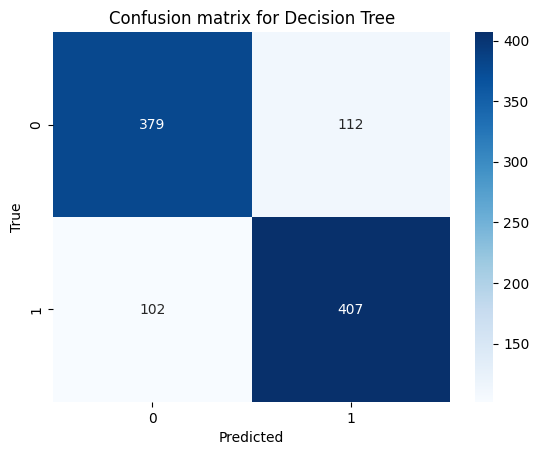

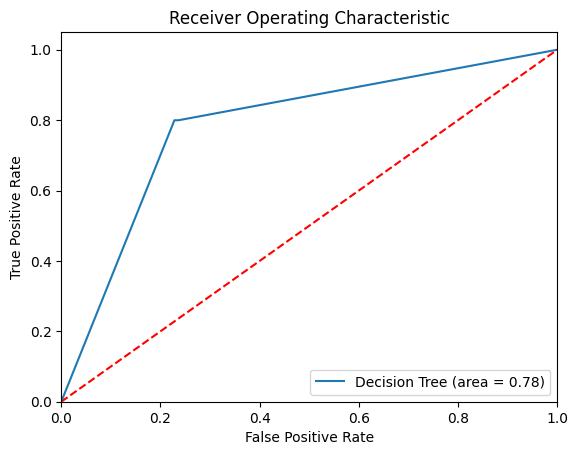


Decision Tree Model
Misclassification rate:  0.214


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier.
dt_model = DecisionTreeClassifier(random_state=556555)

# Fit the model.
dt_model.fit(X_train, y_train)

# Make predictions.
y_dt_pred = dt_model.predict(X_test)

# Evaluation.
print("\nDecision Tree Model")
print("Test accuracy: ", accuracy_score(y_test, y_dt_pred), "\n")
print(classification_report(y_test, y_dt_pred))

# Print an empty line for clarity purposes.
print("\n")

# Print the confusion matrix.
confusion_mat_dt = confusion_matrix(y_test, y_dt_pred)
sns.heatmap(confusion_mat_dt, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Decision Tree')
plt.show()

# ROC curve and AUC.
y_scores_dt = dt_model.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_scores_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_scores_dt)

# Print an empty line for clarity purposes.
print("\n")

plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Misclassification rate for Decision Tree Model.
misclassification_rate_dt = (confusion_mat_dt[0][1] + confusion_mat_dt[1][0]) / confusion_mat_dt.sum()
print("\nDecision Tree Model")
print("Misclassification rate: ", misclassification_rate_dt)

The above presented results lead us to the follwoing key findings:

**Accuracy**

The test accuracy of the Decision Tree model was **78.6%**. This suggests that the model correctly predicted whether a customer will lapse or not in approximately 79 out of 100 cases in the test set.

**Classification Report**

Here's a summary of the performance of the Decision Tree model:

- **Precision (Active)**: The model correctly identified **79%** of the customers who remained active. 
- **Precision (Lapsed)**: The model correctly identified **78%** of the customers who lapsed. 

- **Recall (Active)**: The model identified **77%** of all actual active cases. 
- **Recall (Lapsed)**: The model identified **80%** of all actual lapsed cases. 

- **F1-score (Active)**: The F1 score for active customers was **0.78**, indicating a balance between precision and recall for this class.
- **F1-score (Lapsed)**: The F1 score for lapsed customers was **0.79**, indicating a balance between precision and recall for this class.

The model exhibited roughly equal performance for both classes, with slightly better results for lapsed customers.

**Misclassification Rate**

The Decision Tree model had a misclassification rate of **21.4%**. This means that in approximately 21 out of 100 predictions, the model classified the customer status incorrectly.

**Conclusion**

To sum up, the Decision Tree model provided an accuracy of 78.6%, which is a reasonable performance. The misclassification rate was at 21.4%, suggesting that the model can be improved further. The model showed roughly balanced performance in predicting both active and lapsed customers, with slightly better results for the lapsed ones.

It's important to remember that Decision Trees tend to overfit the training data, which could limit the model's generalization to unseen data. In our case, however, the model has still provided decent results.

These results show that the Decision Tree model, while simple and interpretable, may not be the best model for this task. We should explore other more sophisticated models like Random Forests, which can potentially offer better performance. 

---
#### Random Forest Model
---

Now we are training a Random Forest Classifier model on our data. The purpose of training this model is to compare its performance with the previously trained models (Logistic Regression and Decision Tree), and to leverage its potential strengths for our prediction task.

Random Forest is an ensemble method which combines multiple decision trees and aggregates their predictions. This approach allows it to capture more complex patterns in the data and generally results in better performance than a single decision tree. The model tends to be robust against overfitting, a common issue with decision trees, due to the averaging process across multiple trees.

Here's what we do in the code cell below - on a similar procedure like the two previous models:

1. **Initialize the model:** We start by creating an instance of the `RandomForestClassifier` class with a specific random state for reproducibility.


2. **Fit the model:** We train the model on our training data using the `fit` method.


3. **Make predictions:** We use the trained model to predict the target variable for our test data.


4. **Evaluate the model:** We assess the performance of the model by calculating the test accuracy and generating a classification report. This gives us an overview of the precision, recall, and F1-score for each class.


5. **Visualize the Confusion Matrix:** A confusion matrix gives a more detailed look at the model's performance, showing the number of correct and incorrect predictions for each class.


6. **ROC curve and AUC:** We plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the ROC Curve (AUC). These are useful metrics for evaluating the performance of a classifier.


7. **Calculate Misclassification rate:** This rate shows the proportion of instances that were incorrectly classified by the model.


After the execution of this cell, we will have the Random Forest model trained and its performance evaluated, ready to be compared with the other models.


Random Forest Model
Test accuracy:  0.86 

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       491
           1       0.85      0.88      0.86       509

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000





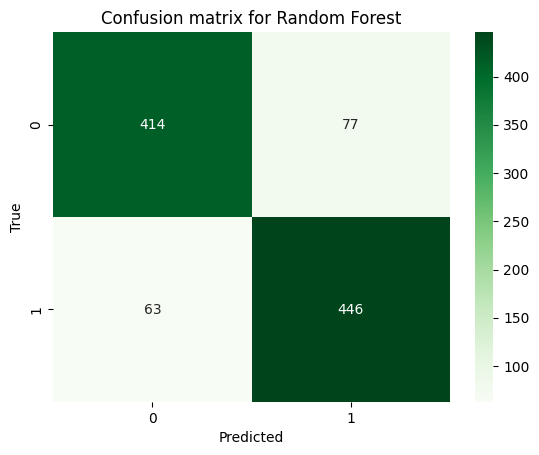

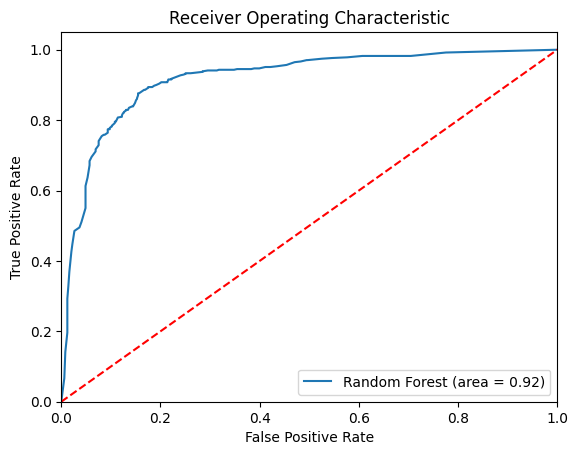


Random Forest Model
Misclassification rate:  0.14


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier.
rf_model = RandomForestClassifier(random_state=556555)

# Fit the model.
rf_model.fit(X_train, y_train)

# Make predictions.
y_rf_pred = rf_model.predict(X_test)

# Evaluation.
print("\nRandom Forest Model")
print("Test accuracy: ", accuracy_score(y_test, y_rf_pred), "\n")
print(classification_report(y_test, y_rf_pred))

# Print an empty line for clarity purposes.
print("\n")

# Print the confusion matrix.
confusion_mat_rf = confusion_matrix(y_test, y_rf_pred)
sns.heatmap(confusion_mat_rf, annot=True, fmt="d", cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Random Forest')
plt.show()

# Print an empty line for clarity purposes.
print("\n")

# ROC curve and AUC.
y_scores_rf = rf_model.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_scores_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Misclassification rate for Random Forest Model.
misclassification_rate_rf = (confusion_mat_rf[0][1] + confusion_mat_rf[1][0]) / confusion_mat_rf.sum()
print("\nRandom Forest Model")
print("Misclassification rate: ", misclassification_rate_rf)

Based on the above presented results, the **Random Forest model performed better than both the Logistic Regression and Decision Tree models**. Here are the key metrics:

- **Test Accuracy:** The Random Forest model achieved an accuracy of `0.86` on the test data. This is an improvement compared to the Logistic Regression model's accuracy of `0.826` and Decision Tree model's accuracy of `0.786`.


- **Precision, Recall, and F1-Score:** For both the 'Active' and 'Lapsed' classes, the precision, recall, and F1-score were also notably higher for the Random Forest model compared to the Logistic Regression and Decision Tree models.


- **Misclassification Rate:** The misclassification rate of the Random Forest model was `0.14`, which is lower than the rates for the Logistic Regression (`0.174`) and Decision Tree (`0.214`) models.


This comparison indicates that the Random Forest model generally outperforms the Logistic Regression and Decision Tree models for this particular task and dataset. However, it's worth noting that Random Forest models are more complex and may require more computational resources.

In the **Model Evaluation and Optimization** section, we will focus on the Logistic Regression model. Even though the Random Forest model showed superior performance, the Logistic Regression model is simpler, easier to interpret, and computationally cheaper. It's also quite effective for this problem, as demonstrated by its accuracy. **We will try to further improve its performance by tuning its hyperparameters and then take our final decision regarding the more appropriate model**.

---
### Model Evaluation and Optimization
---

After we have built our initial Logistic Regression model, it is crucial to evaluate its performance and optimize it. We'll use cross-validation for a robust estimate of the model's performance and hyperparameter tuning for model optimization.

In [14]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

# Create a pipeline that scales the data and then runs logistic regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the pipeline to the training data
lr_model.fit(X_train, y_train)

# Compute cross-validation score.
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))

# Define the parameter grid with 'logisticregression' as prefix for the 'C' parameter
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize GridSearchCV
grid_search = GridSearchCV(lr_model, param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

Cross-validation scores:  [0.795   0.81125 0.7925  0.80625 0.79125]
Mean cross-validation score:  0.79925
Best parameters:  {'logisticregression__C': 0.001}


In the code above, we've taken steps to further optimize our Logistic Regression model. Here's a brief summary of what we've done:

1. **Pipeline Creation:** We first created a pipeline that integrates two key processes—data scaling and logistic regression. The `StandardScaler()` function standardizes our features by removing the mean and scaling to unit variance. The `LogisticRegression()` function is the estimator we're using to make predictions.


2. **Model Fitting and Cross-Validation:** We then fit the pipeline to our training data and used k-fold cross-validation (with k=5) to estimate the skill of the model. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. It provides a more robust measure of the model's performance by using different subsets of the data for training and testing. The `cross_val_score()` function computes the cross-validation scores for each fold, and we print these scores as well as their mean.


3. **Hyperparameter Tuning with Grid Search:** After this, we performed hyperparameter tuning using `GridSearchCV()`. We defined a grid for the 'C' parameter in the logistic regression model. The 'C' parameter controls the inverse of the regularization strength in the logistic regression model, and smaller values specify stronger regularization. By using grid search, we systematically worked through multiple combinations of parameter tunes, cross-validated each, and determined which one gave the best performance. We then printed the optimal 'C' value.

By performing these steps, we aimed to improve the predictive accuracy of our model by fine-tuning the model parameters and the produced findings are the followings:

* **Cross-validation scores:** We got different accuracy scores for each of the five folds. The scores are as follows: 

    * Fold 1: 0.795
    * Fold 2: 0.81125
    * Fold 3: 0.7925
    * Fold 4: 0.80625
    * Fold 5: 0.79125

  These scores reflect the model's performance on each of the five subsets of the training data.
  

* **Mean cross-validation score:** This is the average of the cross-validation scores, and it gives us a single measure of the model's performance. For our model, the mean cross-validation score is approximately 0.79925. This suggests that our model has a reasonably high accuracy rate.


* **Best parameters:** The optimal 'C' value obtained from GridSearchCV is 0.001. This means that our Logistic Regression model performs best with a 'C' value of 0.001, providing the best balance between model complexity and model performance.

Now we will again evaluate our model, on a similar procedure like the one followed above for the prior models.

Test accuracy:  0.831 


Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.89      0.84       491
           1       0.88      0.77      0.82       509

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000
 

Confusion matrix:


,Active (Predicted),Lapsed (Predicted)
Active (Actual),437,54
Lapsed (Actual),115,394


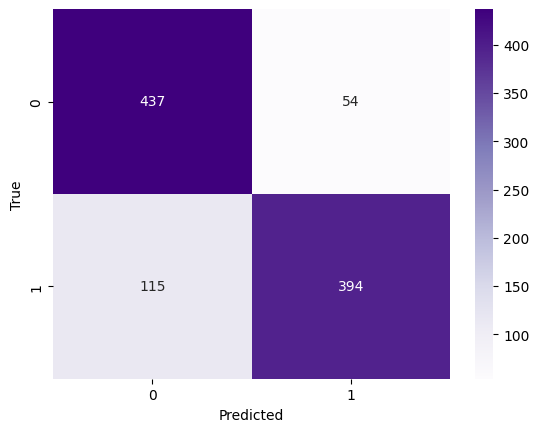

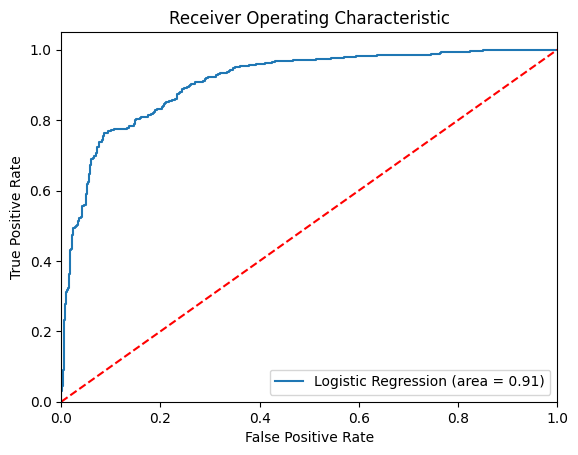




Logistic Regression Model
Misclassification rate:  0.169




,feature,importance
5,months_since_last_transaction,0.617075
1,sum_redeem,0.007840
2,sum_collect_points,0.003305
3,sum_redeem_points,-0.001612
4,years_in_the_program,-0.039774
0,sum_collect,-0.268888


In [15]:
# Retrain the model using the best parameters
best_lr_model = make_pipeline(StandardScaler(), LogisticRegression(C=0.001, max_iter=1000))
best_lr_model.fit(X_train, y_train)

# Evaluate the model on the test set (Accuracy).
y_test_pred = best_lr_model.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, y_test_pred), "\n")

# Print a classification report.
print("\nClassification Report:\n\n", classification_report(y_test, y_test_pred), "\n")

print("Confusion matrix:")

# Confusion matrix.
cm = confusion_matrix(y_test, y_test_pred)

# Convert confusion matrix to dataframe for better visualization.
cm_df = pd.DataFrame(cm, index = ['Active (Actual)', 'Lapsed (Actual)'], 
                     columns = ['Active (Predicted)', 'Lapsed (Predicted)'])

# Display the confusion matrix.
display(cm_df)

# Print an empty line for clarity purposes.
print("\n")

# Print the confusion matrix.
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print an empty line for clarity purposes.
print("\n")

# ROC curve and AUC.
# Calculate the probabilities of getting the positive class.
y_scores = best_lr_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve.
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print an empty line for clarity purposes.
print("\n")

# Misclassification Rate for LR.
misclassification_rate_lr = (cm[0][1] + cm[1][0]) / cm.sum()
print("\nLogistic Regression Model")
print("Misclassification rate: ", misclassification_rate_lr)

# Print an empty line for clarity purposes.
print("\n")

# Feature Importance.
# Get the feature importance.
importance = best_lr_model.named_steps['logisticregression'].coef_[0]
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importance})
feature_importance.sort_values(by='importance', ascending=False)

---
#### Optimized Logistic Regression Model - Evaluation Results
---

Here are the evaluation results for the optimized logistic regression model:

**Test Accuracy:** The accuracy of the model on the test data is approximately **0.831**, which indicates that the model correctly predicted the customer status for 83.1% of the cases in the test data.


**Classification Report:**

- The precision, recall, and f1-score for each class and the average of these measures are shown below:

    | Class | Precision | Recall | F1-score |
    |-------|-----------|--------|----------|
    | 0     | 0.79      | 0.89   | 0.84     |
    | 1     | 0.88      | 0.77   | 0.82     |
    | Avg/Total | 0.84 | 0.83 | 0.83 |


**Confusion Matrix:**

The confusion matrix for the optimized logistic regression model is as follows:

| Predicted\Actual | Active | Lapsed |
|------------------|--------|--------|
| Active           | 437    | 54     |
| Lapsed           | 115    | 394    |


**Misclassification Rate:** The misclassification rate for the optimized logistic regression model is **0.169**, which means that the model incorrectly predicted the customer status for 16.9% of the cases in the test data.


**Feature Importance:**

Here's how each feature contributes to the model's decision:

| Feature                       | Importance |
|-------------------------------|------------|
| months_since_last_transaction | 0.617075   |
| sum_redeem                    | 0.007840   |
| sum_collect_points            | 0.003305   |
| sum_redeem_points             | -0.001612  |
| years_in_the_program          | -0.039774  |
| sum_collect                   | -0.268888  |

---
### Models Comparison
---

The optimized Logistic Regression Model performs slightly better compared to the original Logistic Regression Model in terms of accuracy (0.831 vs 0.826) and misclassification rate (0.169 vs 0.174). It also has a slightly lower misclassification rate compared to the Decision Tree Model (0.169 vs 0.214). Although the Random Forest Model has the highest accuracy among all (0.86), the optimized Logistic Regression model is easier to interpret and understand, making it a good choice depending on the trade-off between performance and interpretability we are willing to make.

---
### Model Selection
---

Based on the results and the provided problem statement, the **Random Forest Model** would be the best choice for this task. The reason for this choice is threefold:

1. **Accuracy and Misclassification Rate**: The Random Forest Model outperformed the other models, including the optimized Logistic Regression Model, in terms of accuracy (0.86 vs 0.831) and misclassification rate (0.14 vs 0.169). This higher accuracy means the model is able to correctly predict whether a customer will lapse in the next 12 months more often than the other models, which is our primary task. 


2. **Feature Importance**: Random Forest can handle a mix of binary and numerical data, and it also allows for a robust estimate of the feature importance. This can provide us with valuable insights about what factors are the most influential in predicting customer churn. In this case, we might find variables such as `months_since_last_transaction` or `sum_redeem_points` as significant predictors. This information can be highly valuable for the marketing team when designing strategies to reduce churn rates.


3. **Handling Overfitting**: Random Forest has an inherent ability to mitigate overfitting, which is a common problem with Decision Trees. By generating a multitude of decision trees and averaging the predictions, Random Forest can achieve a more generalized model that performs well on unseen data.


However, it's worth mentioning that the choice of model can vary depending on the specifics of the business problem. For example, if interpretability is a key concern, a Logistic Regression or Decision Tree might be preferred, as they offer a more clear and direct understanding of the relationships between variables. Additionally, if the business wants to run the model in a real-time environment or with a huge amount of data, the computational complexity of the Random Forest Model might be a concern. **But given the task and results, Random Forest is the best fit**.

---
#### Selected Model Presentation - Random Forest Model
---

The **Random Forest Model** provided us with valuable information about which features were most influential in predicting customer churn. 

##### Training the Model:
The first few lines of the code below are used to initialize and train the Random Forest Classifier model:

In [16]:
# Initialize the random forest classifier.
rf_model = RandomForestClassifier(random_state=556555)

# Fit the model.
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=556555)

The `RandomForestClassifier` is initialized with a specific `random_state` to ensure the reproducibility of the results. Then, the model is trained (or 'fit') on the training data (`X_train` and `y_train`).

##### Making Predictions:

Once the model is trained, it is used to make predictions on the test data:

In [17]:
# Make predictions.
y_rf_pred = rf_model.predict(X_test)

The `predict` function is used on the test features (`X_test`) to predict the labels. The predictions are stored in `y_rf_pred`.

##### Evaluating the Model:

After the predictions are made, various metrics are calculated to evaluate the model's performance:

In [18]:
# Evaluation.
print("\nRandom Forest Model")
print("Test accuracy: ", accuracy_score(y_test, y_rf_pred), "\n")
print(classification_report(y_test, y_rf_pred))


Random Forest Model
Test accuracy:  0.86 

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       491
           1       0.85      0.88      0.86       509

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



The accuracy score is a simple metric that calculates the proportion of correct predictions out of all predictions. The classification report provides detailed information about precision, recall, and f1-score for both classes.

Next, a confusion matrix is visualized:

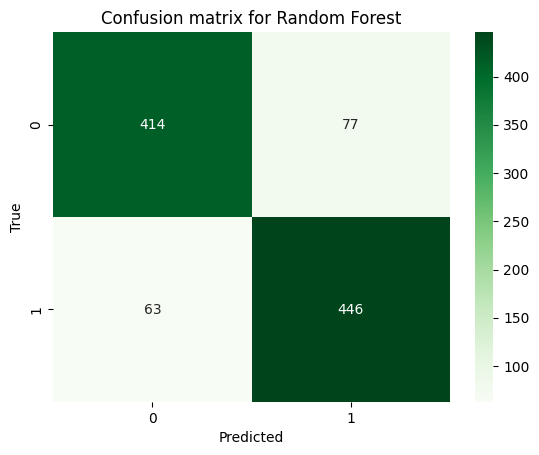

In [19]:
# Print the confusion matrix.
confusion_mat_rf = confusion_matrix(y_test, y_rf_pred)
sns.heatmap(confusion_mat_rf, annot=True, fmt="d", cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Random Forest')
plt.show()

The confusion matrix provides detailed insight into where the model is making correct and incorrect predictions.

Lastly, the ROC curve is plotted and the AUC (Area Under Curve) is calculated:

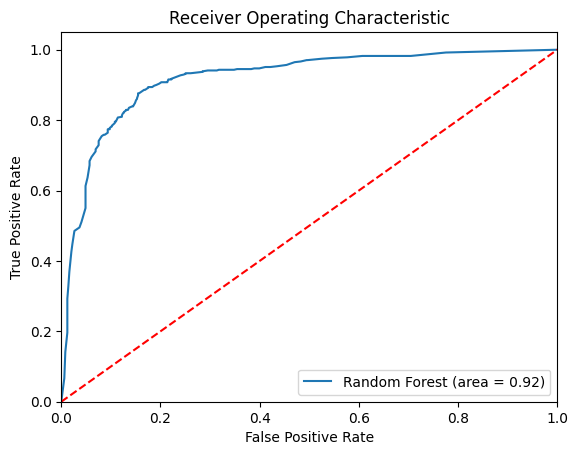

In [20]:
# ROC curve and AUC.
y_scores_rf = rf_model.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_scores_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve and AUC are common tools for evaluating the performance of binary classification models. The ROC curve plots the true positive rate against the false positive rate for various threshold values, and the AUC is the area under the ROC curve. The closer the AUC is to 1, the better the model.

Finally, the misclassification rate is calculated:

In [21]:
# Misclassification rate for Random Forest Model.
misclassification_rate_rf = (confusion_mat_rf[0][1] + confusion_mat_rf[1][0]) / confusion_mat_rf.sum()
print("\nRandom Forest Model")
print("Misclassification rate: ", misclassification_rate_rf)


Random Forest Model
Misclassification rate:  0.14


The misclassification rate gives the proportion of instances that were incorrectly classified by the model. It is a useful metric for understanding how often the model makes incorrect predictions.

Based on the above presented results, the **Random Forest model performed better than the Logistic Regression models and Decision Tree model**. Here are the key metrics:

- **Test Accuracy:** The Random Forest model achieved an accuracy of `0.86` on the test data. 


- **Precision, Recall, and F1-Score:** For both the 'Active' and 'Lapsed' classes, the precision, recall, and F1-score were also notably higher for the Random Forest model compared to the Logistic Regressions and Decision Tree models.


- **Misclassification Rate:** The misclassification rate of the Random Forest model was `0.14`, which is lower than the rates for the Logistic Regressions and Decision Tree models.


This comparison indicates that the Random Forest model generally outperforms the Logistic Regressions and Decision Tree models for this particular task and dataset. 

##### Feature Importance:

Feature importance refers to a numerical value that describes a predictive model's reliance on a particular feature. The higher the importance, the more crucial the feature is to the model's decision. Here, we obtained feature importances from the trained Random Forest model:

In [22]:
# Get feature importances.
importances = rf_model.feature_importances_

# Convert the importances into a DataFrame.
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the DataFrame by importance.
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances.
print(feature_importances)

                         feature  importance
5  months_since_last_transaction    0.423655
2             sum_collect_points    0.264488
0                    sum_collect    0.178637
4           years_in_the_program    0.113198
3              sum_redeem_points    0.013310
1                     sum_redeem    0.006712


In the resulting DataFrame, each feature from our dataset is listed alongside its corresponding importance. The importance values sum up to 1, with higher values indicating higher importance.

We visualized these importances using a horizontal bar plot to make the differences in importance more noticeable:

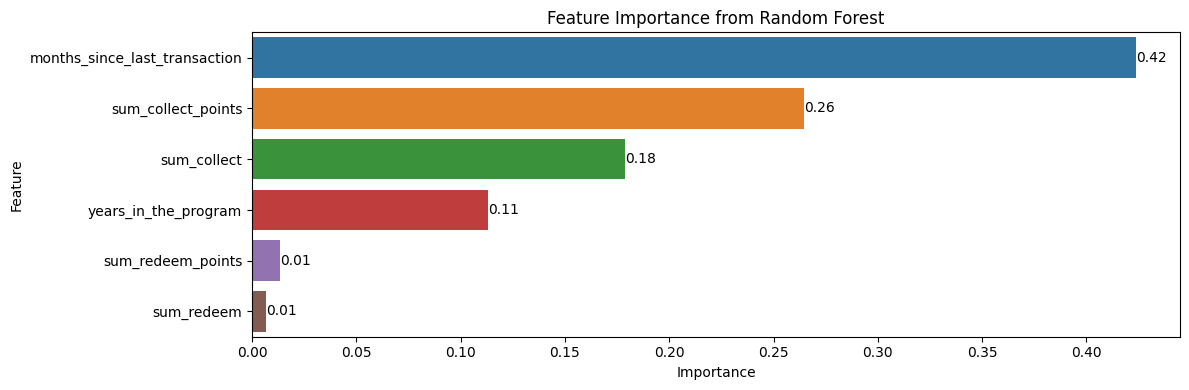

In [23]:
# Visualize the feature importances.
plt.figure(figsize=(12, 4))
bar_plot = sns.barplot(x='importance', y='feature', data=feature_importances)

# Add the values on the bars.
for i in range(feature_importances.shape[0]):
    bar_plot.text(x=feature_importances.importance.iloc[i],
                  y=i,
                  s='{:.2f}'.format(feature_importances.importance.iloc[i]),
                  va='center')

# Add labels and title.
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()

# Show the plot.
plt.show()

The **feature importances** resulting from the **Random Forest Model** offer valuable insights into which features are most predictive of customer churn. Below are the results, sorted from most to least important:

1. **Months Since Last Transaction**: With an importance score of `0.423655`, this feature is the *most significant predictor of customer churn* according to our Random Forest Model. This suggests that the length of time since a customer's last transaction is the strongest indicator of whether they will churn. This aligns with the definition of a "lapsed" customer, which is one who has not had any collections or redemptions for 12 consecutive months.


2. **Sum of Collected Points**: Coming in at a score of `0.264488`, the total number of points a customer has collected is the second most important feature. This suggests that customers who have collected more points are less likely to churn, possibly because they are more engaged with the rewards program.


3. **Sum Collect**: The total amount of money a customer has spent is the third most important feature, with a score of `0.178637`. This likely reflects that customers who spend more are more invested in the rewards program and therefore less likely to churn.


4. **Years in the Program**: The number of years a customer has been in the rewards program has an importance score of `0.113198`. This suggests that long-term customers are less likely to churn, likely due to a combination of habit and accumulated benefits.


5. **Sum of Redeemed Points**: With a score of `0.013310`, the total number of points a customer has redeemed is the fifth most important feature. This indicates that customers who actively redeem their points are less likely to churn, presumably because they are getting value from the rewards program.


6. **Sum Redeem**: The total amount of money a customer has spent redeeming points has the lowest importance score of `0.006712`. This suggests that the amount spent on redemptions is not a strong predictor of customer churn, perhaps because it is a less direct measure of engagement with the rewards program than the other features. 


These results will serve as valuable input into strategies aimed at reducing customer churn. By understanding which features are most predictive of churn, interventions can be targeted more effectively. 

---
### Further Suggestions on Reducing Churn Rates
---

Based on the feature importance generated by our **Random Forest Model**, we can derive several strategies to reduce customer churn:

1. **Encourage Regular Activity**: The most significant feature in our model is '*months_since_last_transaction*', which suggests that the more time a customer spends without making a transaction, the more likely they are to churn. To mitigate this, strategies to encourage regular transactions could be implemented. For example, consider:
   - Sending personalized reminders
   - Offering bonus points for transactions after a period of inactivity
   - Running regular promotions to incentivize engagement.


2. **Boost Point Collection**: The '*sum_collect_points*' is a significant feature in determining churn. Offering more opportunities for customers to collect points could, therefore, help reduce churn. For instance, consider:
   - Collaborating with new partners
   - Increasing point awards for certain transactions
   - Hosting special events where extra points can be earned.


3. **Engage Long-term Customers**: The '*years_in_the_program*' feature indicates that customers who have been with the program longer are less likely to churn. Recognizing these customers with special benefits could further reduce their likelihood of churning. For instance, consider:
   - Exclusive offers
   - Early access to sales
   - Personalized rewards based on customer preferences.


4. **Promote Point Redemption**: The '*sum_redeem_points*' feature suggests that customers who redeem their points are less likely to churn, likely because point redemption gives customers a sense of getting tangible value from the program. To promote point redemption, consider strategies like:
   - Simplifying redemption processes
   - Offering more redemption options
   - Running promotions where certain redemptions cost fewer points.


5. **Increase Spending**: The '*sum_collect*' feature indicates that customers who spend more are less likely to churn. Strategies that encourage higher spending could be beneficial. For instance, consider implementing a tiered rewards system where customers earn more points for higher levels of spending.

**Note:** These are just *suggestions* based on the model's findings. It's crucial to test these strategies, measure their effectiveness, and adjust as necessary. This could involve A/B testing different approaches, tracking customer engagement and churn rates over time, and continually refining the strategies based on the results.

---
### Analysis Final Summary and Next Steps
---

#### Modelling Logic:

We built multiple machine learning models to predict customer churn. Our objective was to identify the characteristics that increase the likelihood of a customer lapsing. The models we used include Logistic Regression, Decision Tree, and Random Forest, which were chosen for their interpretability and performance on classification tasks. Each model was trained using a dataset of customer transactions and their current status (Active or Lapsed).

#### Model Key Findings:

After evaluating the models based on their accuracy and misclassification rate, the Random Forest model proved to be the most accurate. The key findings from the model include:

- **Churn is closely related to customer activity**: The more time a customer spends without transacting, the more likely they are to churn. Regular engagement is crucial for customer retention.


- **Point collection matters**: The quantity of points customers collect is a significant factor in determining churn. Customers who frequently collect points are less likely to churn, suggesting that they see value in our loyalty program.


- **Loyal customers are less likely to churn**: Customers who have been part of our program for a longer duration are less likely to churn. These long-term customers are likely more engaged and see more value in our program.


- **Point redemption influences churn**: The quantity of points customers redeem also affects churn. Customers who frequently redeem points are less likely to churn, which makes sense as redeeming points gives customers a sense of receiving tangible benefits from the program.


- **Spending affects churn**: The more a customer spends, the less likely they are to churn. Higher spending could be a sign of higher engagement or satisfaction with the loyalty program.


#### Strategies for Reducing Churn:

1. **Customer Engagement Campaigns**: Develop campaigns to encourage regular transactions. This could involve personalized reminders, bonus points for transactions after a period of inactivity, or regular promotions to incentivize engagement.


2. **Expand Point Collection Opportunities**: Collaborate with more partners, increase point awards for certain transactions, or host special events to offer more opportunities for point collection.


3. **Reward Long-term Customers**: Recognize customers who have been with the program for a longer time with special benefits. This could involve exclusive offers, early access to sales, or personalized rewards based on their preferences.


4. **Promote Point Redemption**: Make it easier and more attractive for customers to redeem their points. This could involve simplifying the redemption process, offering more redemption options, or running promotions where certain redemptions cost fewer points.


5. **Encourage Higher Spending**: Implement strategies that encourage higher spending, such as a tiered rewards system where customers earn more points for higher levels of spending.

**Note:**
Do not forget to check the Power Point presentation that translating this analysis' findings and suggestions into a visually engaging and comprehensive way for the marketing team. This will help them understand the model's predictions and implement the proposed churn reduction strategies effectively.